In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
import re

In [2]:
df = pd.read_csv("combined_data.csv")

In [3]:
df = df[df['Original dataset'] != 'essays']
df['Length'] = df['Text'].apply(lambda x: len(x))
df['Log_length'] = np.log10(df['Length'])

In [4]:
grover = df[df['Original dataset'] == 'grover']
wiki = df[df['Original dataset'] == 'wiki']
reviews = df[df['Original dataset'] == 'reviews']

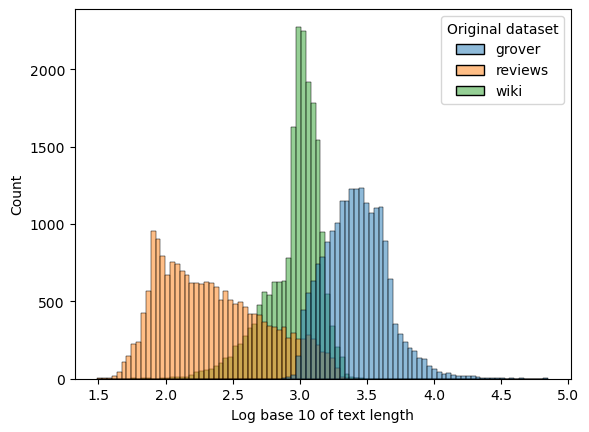

In [5]:
ax = sns.histplot(data = df,
            x = 'Log_length',
            hue = 'Original dataset')
ax.set_xlabel("Log base 10 of text length")
plt.show()

**Observation:** Grover texts skew significantly longer than the other datasets.

In [6]:
def vocab_counts(dataset: pd.DataFrame) -> dict:
    """Count occurrences of each word over all entries in dataset['Text']"""

    counts = {}
    
    for text in dataset['Text']:
        # Strip punctuation, replace linebreaks with spaces
        text = text.lower()
        text = text.replace("\n", " ")
        text = re.sub(r'[^a-z0-9 ]', '', text)
        
        for word in text.split(" "):
            if word in counts:
                counts[word] += 1
            else:
                counts[word] = 1
    return counts

In [7]:
grover_vocab_counts = vocab_counts(grover)
wiki_vocab_counts = vocab_counts(wiki)
review_vocab_counts = vocab_counts(reviews)

In [8]:
print(f"""Words in grover vocab: {len(grover_vocab_counts)}
Words in wiki vocab:   {len(wiki_vocab_counts)}
Words in review vocab: {len(review_vocab_counts)}""")

Words in grover vocab: 189057
Words in wiki vocab:   143462
Words in review vocab: 35164


**Observation:** Grover also has a significantly larger vocabulary.

In [9]:
grover_counts_df = pd.DataFrame([[word, grover_vocab_counts[word]] for word in grover_vocab_counts])
grover_counts_df.columns = ['Word', 'Count']
grover_counts_df['Dataset'] = 'grover'

wiki_counts_df = pd.DataFrame([[word, wiki_vocab_counts[word]] for word in wiki_vocab_counts])
wiki_counts_df.columns = ['Word', 'Count']
wiki_counts_df['Dataset'] = 'wiki'

review_counts_df = pd.DataFrame([[word, review_vocab_counts[word]] for word in review_vocab_counts])
review_counts_df.columns = ['Word', 'Count']
review_counts_df['Dataset'] = 'review'

counts_df = pd.concat([grover_counts_df, wiki_counts_df, review_counts_df])
counts_df['Log10 count'] = np.log10(counts_df['Count'])

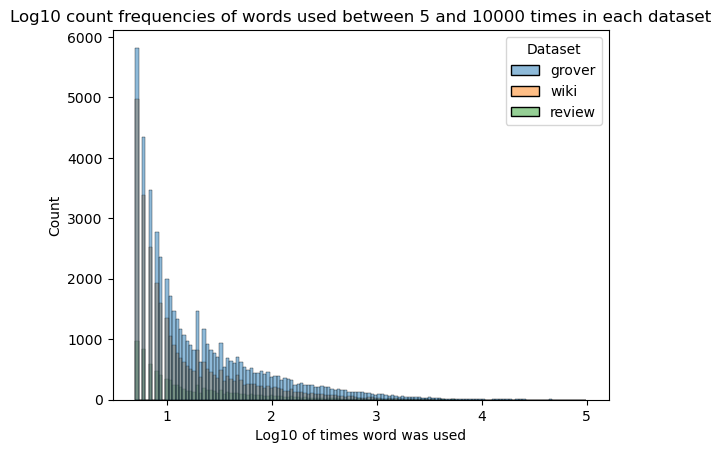

In [25]:
ax = sns.histplot(data = counts_df[(counts_df['Count'] > 4) & (counts_df['Count'] < 10e4)],
             x = 'Log10 count',
             hue = 'Dataset',
            )
ax.set_xlabel("Log10 of times word was used")
plt.title("Log10 count frequencies of words used between 5 and 10000 times in each dataset")
plt.show()